In [191]:
import pandas as pd # Use the work with the data 2frames
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [192]:
tp_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_1993-2000_pwl_harmwl_bwl.csv')
tp_9300_LH.drop(labels=range(len(tp_9300_LH)-6,len(tp_9300_LH)), axis=0, inplace=True)
tp_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2001-2012_pwl_harmwl_bwl.csv')
tp_0112_LH.drop(labels=range(len(tp_0112_LH)-6,len(tp_0112_LH)), axis=0, inplace=True)
tp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2013-2023_pwl_harmwl_bwl.csv')
tp_1323_LH.drop(labels=range(len(tp_1323_LH)-6,len(tp_1323_LH)), axis=0, inplace=True)
directory_path = '/Users/rprocious/Downloads/data 2/NOAA/texasPoint/'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

tp_NOAA = pd.concat(dataframes, ignore_index=True)
tp_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
tp_NOAA.reset_index(drop = True, inplace=True)
frames = [tp_9300_LH,tp_0112_LH,tp_1323_LH]
tp_LH = pd.concat(frames, ignore_index=True)
tp_LH.drop(labels=range(0,262800),axis=0, inplace=True)
tp_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = tp_LH['#date+time']
comparison_df['Lighthouse WL'] = tp_LH['126-pwl']
comparison_df['NOAA WL'] = tp_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_84034/369914491.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  tp_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2001-2012_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_84034/369914491.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  tp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2013-2023_pwl_harmwl_bwl.csv')


,Dates,Lighthouse WL,NOAA WL
0,2002-05-26 15:00:00,NaN,NaN
1,2002-05-26 15:06:00,NaN,NaN
2,2002-05-26 15:12:00,NaN,NaN
3,2002-05-26 15:18:00,NaN,NaN
4,2002-05-26 15:24:00,NaN,NaN
...,...,...,...
280633,2015-03-15 08:30:00,NaN,1.287
280634,2015-03-15 08:36:00,NaN,1.283
280635,2015-03-15 08:42:00,NaN,1.265
280636,2015-03-15 08:48:00,NaN,1.257


In [193]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


In [194]:
comparison_df['Lighthouse WL'] = comparison_df['Lighthouse WL']

Text(0.5, 1.0, 'Texas Point')

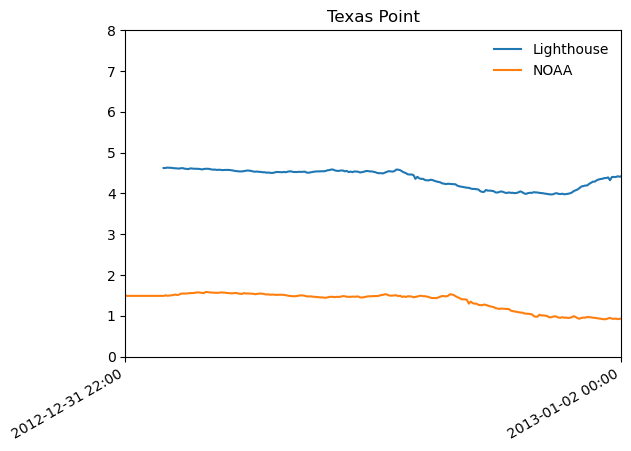

In [195]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(0,8)

start_date = pd.to_datetime('2012-12-31 22:00')

end_date = pd.to_datetime('2013-01-02 00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Texas Point')

In [196]:
date_index_locater('2013-01-01 00:00','2013-01-01 01:00')

[87828, 87829, 87830, 87831, 87832, 87833, 87834, 87835, 87836, 87837, 87838]

In [197]:
#drops a nan value before time shift
revised_LH = pd.DataFrame()
revised_LH['Adjusted NOAA WL'] = comparison_df['NOAA WL']
revised_LH.drop(range(87828,87856),axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted NOAA WL'] = revised_LH['Adjusted NOAA WL'] + 3.059
comparison_df[87810:87860]

,Dates,Lighthouse WL,NOAA WL,Shifted NOAA WL
87810,2003-05-27 12:00:00,NaN,1.350,1.350
87811,2003-05-27 12:06:00,NaN,1.353,1.353
87812,2003-05-27 12:12:00,NaN,1.345,1.345
87813,2003-05-27 12:18:00,NaN,1.368,1.368
87814,2003-05-27 12:24:00,NaN,1.374,1.374
87815,2003-05-27 12:30:00,NaN,1.389,1.389
87816,2003-05-27 12:36:00,NaN,1.394,1.394
87817,2003-05-27 12:42:00,NaN,1.401,1.401
87818,2003-05-27 12:48:00,NaN,1.393,1.393
87819,2003-05-27 12:54:00,NaN,1.419,1.419


Text(0.5, 1.0, 'Texas Point')

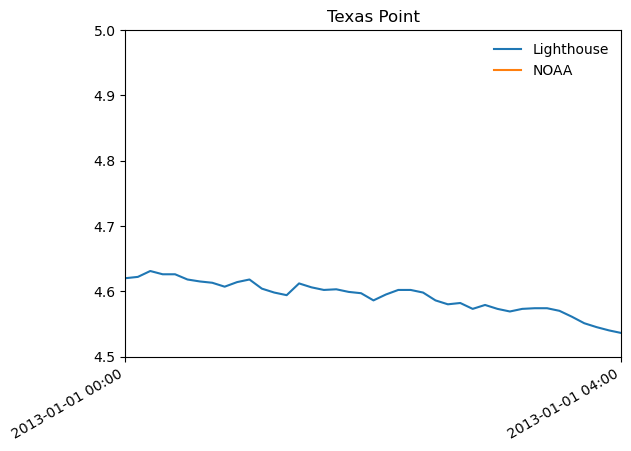

In [198]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(4.5,5)

start_date = pd.to_datetime('2013-01-01 00:00')

end_date = pd.to_datetime('2013-01-01 04:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Texas Point')

In [199]:
comparison_df['difference'] = comparison_df['Shifted NOAA WL'] - comparison_df['Lighthouse WL']
comparison_df[127810:127860]

,Dates,Lighthouse WL,NOAA WL,Shifted NOAA WL,difference
127810,2013-06-16 14:12:00,4.603,1.457,1.534,-3.069
127811,2013-06-16 14:18:00,4.597,1.436,1.528,-3.069
127812,2013-06-16 14:24:00,4.593,1.420,1.524,-3.069
127813,2013-06-16 14:30:00,4.593,1.441,1.525,-3.068
127814,2013-06-16 14:36:00,4.580,1.440,1.510,-3.070
127815,2013-06-16 14:42:00,4.582,1.454,1.511,-3.071
127816,2013-06-16 14:48:00,4.586,1.450,1.517,-3.069
127817,2013-06-16 14:54:00,4.585,1.466,1.514,-3.071
127818,2013-06-16 15:00:00,4.574,1.465,1.501,-3.073
127819,2013-06-16 15:06:00,4.568,1.468,1.496,-3.072


Text(0.5, 1.0, 'Texas Point')

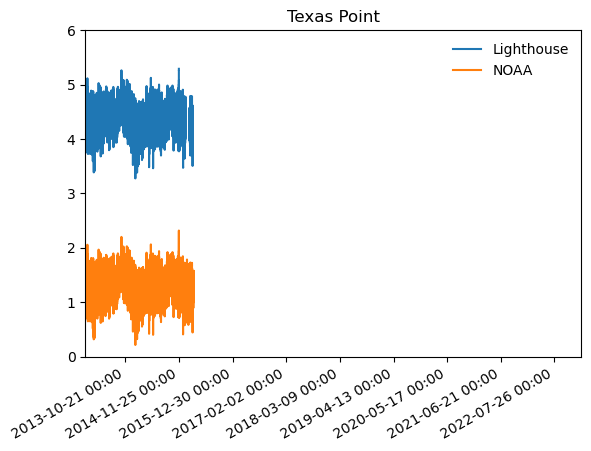

In [204]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(0,6)

start_date = pd.to_datetime('2012-12-25 00:00')

end_date = pd.to_datetime('2023-02-11 00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Texas Point')